In [1]:
# Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("../data/spaceship_train.csv")
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df_test = pd.read_csv("../data/spaceship_test.csv")
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Checking the first 10 values of train and test dataset

In [4]:
df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
df_test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


# Exploratory Data Analysis (EDA)

### Checking the datatypes

In [6]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Null values
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Describing the dataset
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
# Shape of the dataset
df_train.shape

(8693, 14)

In [11]:
# Total size of the dataset
df_train.size

121702

In [12]:
# Dimension of the dataset
df_train.ndim

2

In [13]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [14]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
# Removing the unwanted columns from df_train dataset
df_train.drop('Name', axis = 1, inplace = True)

In [16]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [17]:
# Missing Values
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [18]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

## Filling missing values with median or mode with respect to data

In [19]:
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        df_train[i].fillna(df_train[i].mode()[0], inplace=True)
    else:
        df_train[i].fillna(df_train[i].median(), inplace=True)
print(df_train)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingM

In [20]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Comparison of different columns

In [21]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# Plotting Graph

<Figure size 720x432 with 0 Axes>

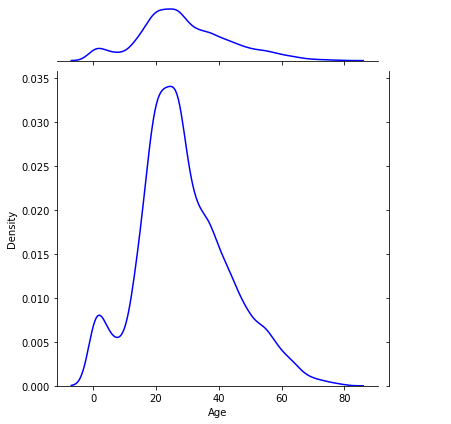

In [22]:
plt.figure(figsize=(10,6))
sns.jointplot(data = df_train, x = 'Age', color='blue', kind= 'kde');

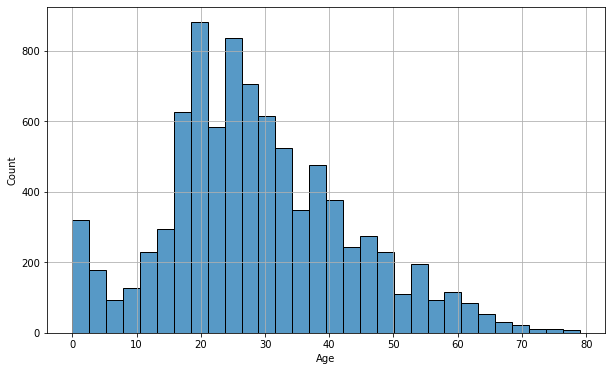

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data= df_train, x= "Age", bins= 30);
plt.grid()

## Changing the categorical columns to numerical

In [24]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [25]:
le = LabelEncoder()

df_train['HomePlanet'] = le.fit_transform(df_train['HomePlanet'])

In [26]:
df_train['CryoSleep'] = le.fit_transform(df_train['CryoSleep'])

In [27]:
df_train['Cabin'] = le.fit_transform(df_train['Cabin'])

In [28]:
df_train['Destination'] = le.fit_transform(df_train['Destination'])

In [29]:
df_train['Transported'] = le.fit_transform(df_train['Transported'])

In [30]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,149,2,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2184,2,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,1,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,1,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2186,2,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,146,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,0,1,5280,1,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,0,0,5285,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,1,0,2131,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


# Correlation Matrix

In [31]:
df_train.corr()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.083586,-0.473877,0.034737,0.133577,0.123512,0.211751,0.071454,0.101383,0.055047,0.039824,0.115461
CryoSleep,0.083586,1.000000,0.114685,-0.096287,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Cabin,-0.473877,0.114685,1.000000,0.118619,-0.238801,-0.148633,-0.075133,-0.261932,-0.067903,-0.182856,-0.212167,-0.052972
Destination,0.034737,-0.096287,0.118619,1.000000,-0.006771,-0.044707,0.045733,-0.111057,0.024721,-0.055815,-0.073293,-0.108152
Age,0.133577,-0.071323,-0.238801,-0.006771,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,0.123512,-0.078281,-0.148633,-0.044707,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,0.211751,-0.244089,-0.075133,0.045733,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.071454,-0.205928,-0.261932,-0.111057,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.101383,-0.207798,-0.067903,0.024721,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.055047,-0.198307,-0.182856,-0.055815,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545


## HeatMap

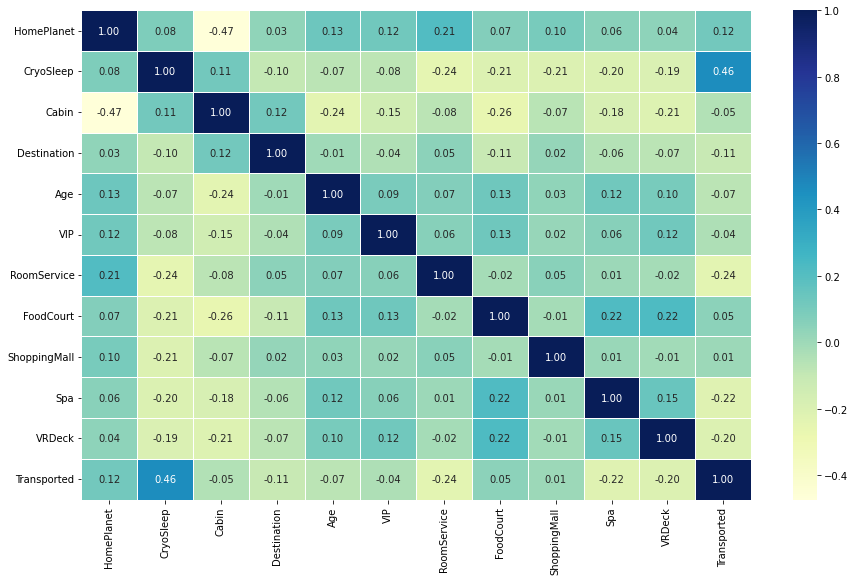

In [32]:
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize = (15, 9))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Train and Test data

In [33]:
X =df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [34]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.33, random_state=101)

In [35]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4475,4757_01,0,0,4402,2,24.0,False,185.0,0.0,476.0,1810.0,53.0
2678,2869_01,0,1,5757,1,61.0,False,0.0,0.0,0.0,0.0,0.0
1558,1653_01,1,0,22,2,47.0,False,4.0,1303.0,830.0,774.0,2.0
357,0392_01,0,0,1609,2,48.0,False,0.0,111.0,0.0,1508.0,0.0
115,0120_01,2,1,3500,2,24.0,False,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
599,0628_01,0,0,2670,2,44.0,False,103.0,0.0,18.0,1197.0,1.0
5695,6034_03,2,0,1821,2,8.0,False,0.0,0.0,0.0,0.0,0.0
8006,8570_01,0,1,5106,1,19.0,False,0.0,0.0,0.0,0.0,0.0
1361,1434_01,0,0,5401,2,20.0,False,0.0,258.0,331.0,133.0,0.0


In [36]:
y_train

4475    0
2678    1
1558    0
357     0
115     1
       ..
599     1
5695    1
8006    0
1361    0
1547    0
Name: Transported, Length: 5824, dtype: int64

### Trying different Models

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
param_grid= {
    "n_estimators": [10, 200, 10],
    "max_depth":[2,4],
    "min_samples_split": [2,5],
    "min_samples_leaf": [2,5],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
    }

# EDA for Test Dataset

In [ ]:
df = df_test

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
# Null values
df.isnull().sum()

In [ ]:
# Describing the dataset
df.describe()

## Filling missing values of test dataset with median or mode with respect to data

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
print(df)

In [ ]:
df.drop(['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall','Name'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
le = LabelEncoder()

df['HomePlanet'] = le.fit_transform(df['HomePlanet'])

In [ ]:
df['CryoSleep'] = le.fit_transform(df['CryoSleep'])

In [ ]:
df['Cabin'] = le.fit_transform(df['Cabin'])

In [ ]:
df['Destination'] = le.fit_transform(df['Destination'])

### Predictions of test dataset

In [ ]:
y_df = clf.predict(df)
y_df

Converting the numerical data to categorical data

In [ ]:
ls = []
for i in range(len(y_df)):
    if y_df[i] == 1:
        ls.append('True')
    else:
        ls.append('False')
ls
    

In [ ]:
arr = np.array(ls)
len(arr)

In [ ]:
entry = pd.DataFrame(
    {'PassengerId':df["PassengerId"] ,
     'Transported': arr},columns=['PassengerId', 'Transported'])

In [ ]:
entry

### Saving the entry to CSV

In [ ]:
entry.to_csv('submission.csv')